In [54]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Import Dataset


In [55]:
df = pd.read_csv("D:/ML_OPS/Vehicle Insurance Mlops Project/Vehicle_Insurance_MLOps/notebook/EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


-> case_id: Unique identifier assigned to each visa application case. Helps in tracking and referencing specific applications.

-> continent: Specifies the continent (e.g., Asia, Europe) from which the employee is applying. Useful for demographic or regional analysis.

-> education_of_employee: Indicates the highest level of education attained by the employee (e.g., Bachelor's, Master's, PhD). Important for analyzing qualification levels.

-> has_job_experience: Denotes whether the employee has prior job experience.

        Y = Yes, has experience
        N = No experience

-> requires_job_training: Indicates if the employee needs any job-related training for the position.

        Y = Requires training
        N = Does not require training

-> no_of_employees: Number of total employees working at the employer's company. Reflects the company size and can be relevant in success rate analysis.

-> yr_of_estab: The year in which the employer’s company was established. Can help assess company stability and history.

-> region_of_employment: Refers to the U.S. region where the foreign worker is intended to work (e.g., Northeast, West). Useful for geographic employment trends.

-> prevailing_wage: The average wage paid to workers with similar roles in the same area. Ensures fairness and prevents underpayment of foreign workers.

-> unit_of_wage: The unit in which the prevailing wage is expressed.

-> Possible values: Hourly, Weekly, Monthly, Yearly

-> full_time_position: Specifies whether the job role is full-time or part-time.

        Y = Full-time position
        N = Part-time position

-> case_status: Final decision on the visa application.

-> Common values: Certified = Approved, Denied = Rejected

## EDA

In [56]:
df.shape

(25480, 12)

In [57]:
# checking for null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [59]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


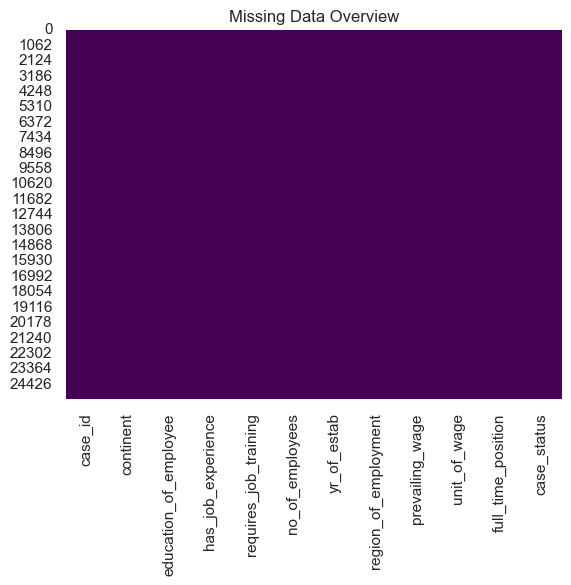

In [60]:
## Heatmap for the Correlation
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  
plt.title('Missing Data Overview')  
plt.show() 


In [61]:
print('Duplicates:', df.duplicated().sum())  
df = df.drop_duplicates()

Duplicates: 0


In [62]:
#  Data cleaning & feature engineering
flags = ['has_job_experience','requires_job_training','full_time_position']  
for col in flags:  
    df[col] = df[col].map({'Y': True, 'N': False})

In [63]:
# convert wage to numeric  
df['prevailing_wage'] = pd.to_numeric(df['prevailing_wage'], errors='coerce') 

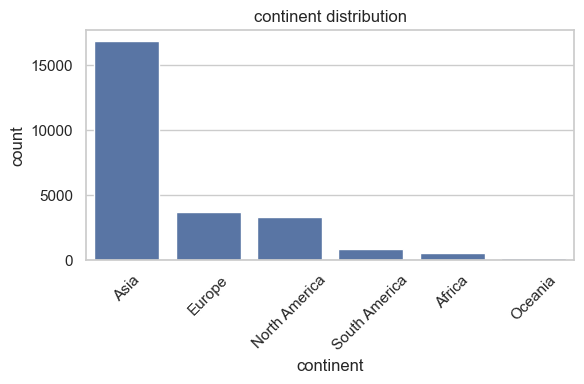

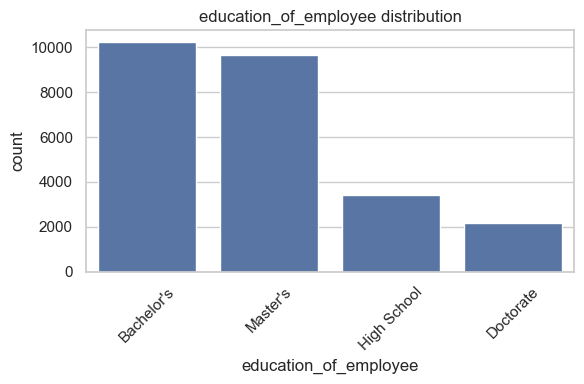

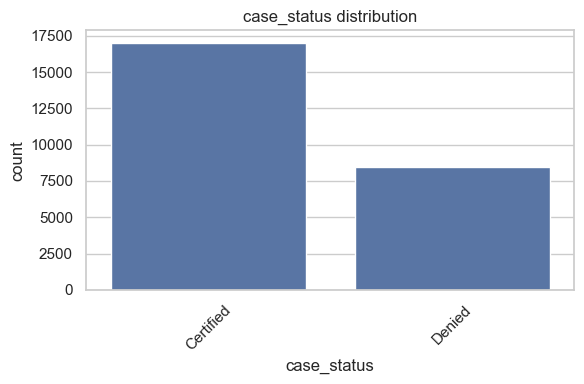

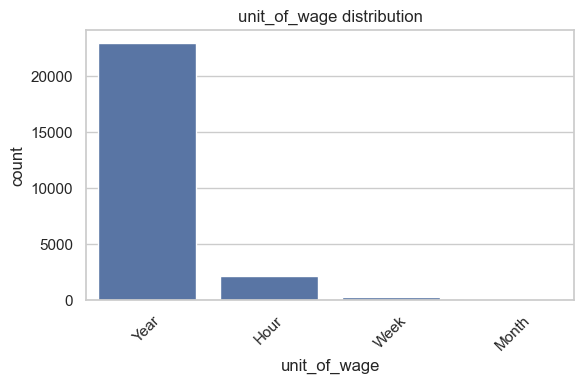

In [64]:
# Univariate analysis  
# Categorical  
for col in ['continent','education_of_employee','case_status','unit_of_wage']:  
    plt.figure(figsize=(6,4))  
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  
    plt.title(f'{col} distribution')  
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show

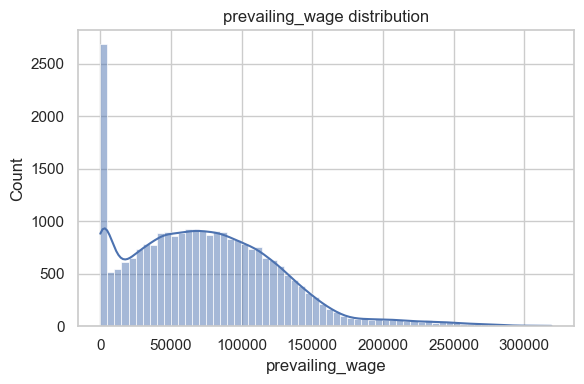

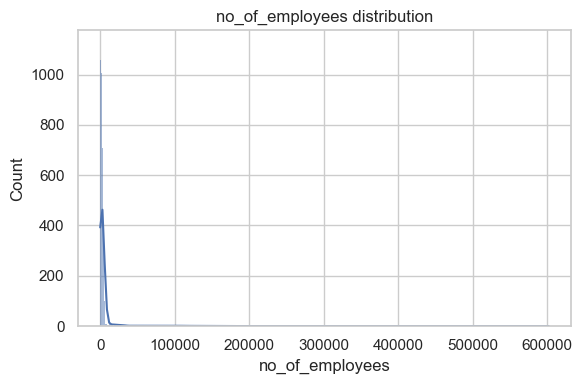

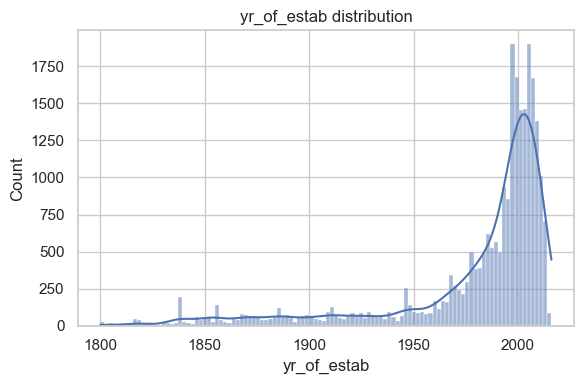

In [65]:
# Numerical  
for col in ['prevailing_wage','no_of_employees','yr_of_estab']:  
    plt.figure(figsize=(6,4))  
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f'{col} distribution')  
    plt.tight_layout()  
    plt.show()

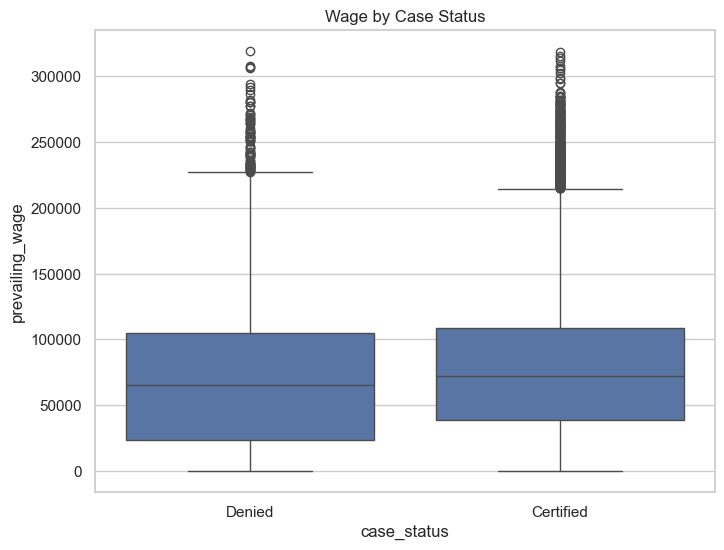

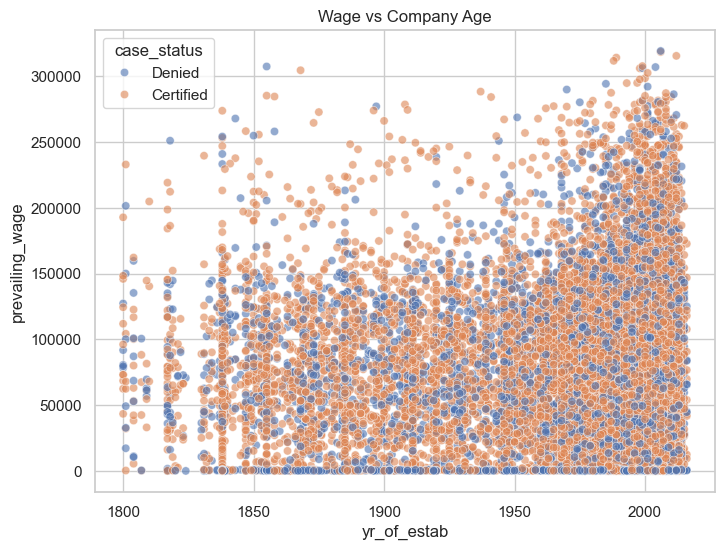

In [66]:
# Bivariate analysis  
plt.figure(figsize=(8,6))  
sns.boxplot(data=df, x='case_status', y='prevailing_wage')  
plt.title('Wage by Case Status')  
plt.show()

plt.figure(figsize=(8,6))  
sns.scatterplot(data=df, x='yr_of_estab', y='prevailing_wage', hue='case_status', alpha=0.6)  
plt.title('Wage vs Company Age')  
plt.show()

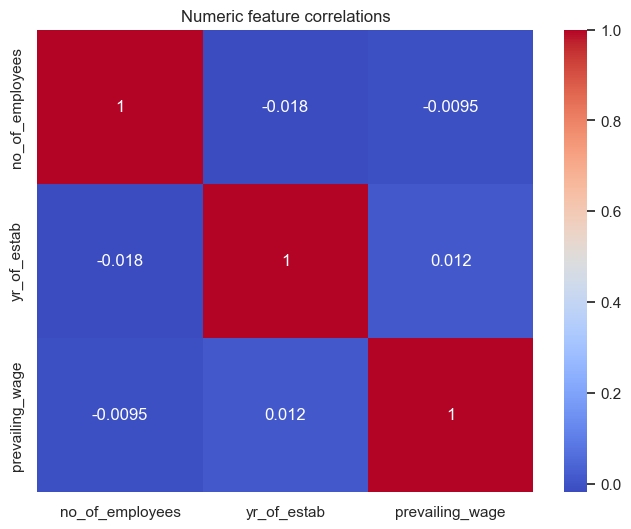

In [67]:
# Correlation matrix  
num_cols = df.select_dtypes(include=['float64','int64']).columns  
corr = df[num_cols].corr()  
plt.figure(figsize=(8,6))  
sns.heatmap(corr, annot=True, cmap='coolwarm')  
plt.title('Numeric feature correlations')  
plt.show()

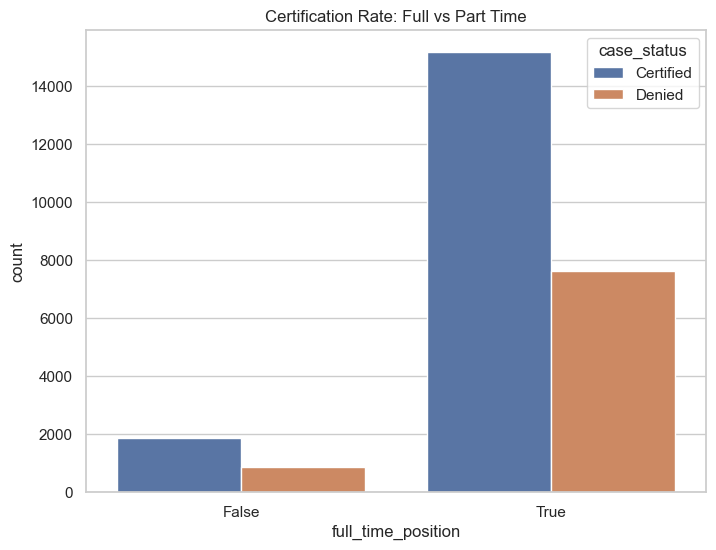

In [68]:
#  Advanced: analyze full-time vs part-time  
plt.figure(figsize=(8,6))  
sns.countplot(data=df, x='full_time_position', hue='case_status')  
plt.title('Certification Rate: Full vs Part Time')  
plt.show()

In [69]:
# Export summary  
summary = df.groupby('case_status').agg({
    'prevailing_wage':['mean','median','count'],
    'has_job_experience':'mean',
    'requires_job_training':'mean'
})
print(summary)

            prevailing_wage                  has_job_experience  \
                       mean    median  count               mean   
case_status                                                       
Certified      77293.619243  72486.27  17018           0.647785   
Denied         68748.681580  65431.46   8462           0.446467   

            requires_job_training  
                             mean  
case_status                        
Certified                0.117875  
Denied                   0.112148  


## Data Preprocessing

In [70]:
#  Imports
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(style='whitegrid')


In [71]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,False,False,14513,2007,West,592.2029,Hour,True,Denied
1,EZYV02,Asia,Master's,True,False,2412,2002,Northeast,83425.6500,Year,True,Certified
2,EZYV03,Asia,Bachelor's,False,True,44444,2008,West,122996.8600,Year,True,Denied
3,EZYV04,Asia,Bachelor's,False,False,98,1897,West,83434.0300,Year,True,Denied
4,EZYV05,Africa,Master's,True,False,1082,2005,South,149907.3900,Year,True,Certified


In [72]:
# Splitting the Data
X = df.drop(columns=['case_status','case_id'])
y = df['case_status'].map({'Certified':1,'Denied':0})

In [73]:
# # convert Y/N to binary
for col in ['has_job_experience','requires_job_training','full_time_position']:
    X[col] = X[col].map({'Y':1,'N':0})


In [74]:
from sklearn.impute import SimpleImputer

# Define columns
cat_cols = ['continent','education_of_employee','region_of_employment','unit_of_wage']
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Numeric pipeline: imputes missing values and standardizes
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: imputes and one-hot encodes
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combined preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [75]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier
# Model pipelines and param grids
models = {
    'LogisticRegression': Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))]),
    'RandomForest':     Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier())]),
    'GradientBoosting': Pipeline([('pre', preprocessor), ('clf', GradientBoostingClassifier())]),
    'SVC':              Pipeline([('pre', preprocessor), ('clf', SVC(probability=True))]),
    # Optionally include HistGradientBoostingClassifier without imputer
    'HistGB':           Pipeline([('pre', preprocessor),
                                  ('clf', HistGradientBoostingClassifier())])
}

param_grids = {
    'LogisticRegression': {
        'clf__C':[0.01,0.1,1,10], 'clf__penalty':['l2']
    },
    'RandomForest': {
        'clf__n_estimators':[50,100], 'clf__max_depth':[5,10,None]
    },
    'GradientBoosting': {
        'clf__n_estimators':[50,100], 'clf__learning_rate':[0.01,0.1]
    },
    'SVC': {
        'clf__C':[0.1,1,10], 'clf__kernel':['rbf','poly']
    }
}

In [ ]:
# Hyperparameter tuning and selection
best_models = {}
for name, pipeline in models.items():
    gs = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)
    best_models[name] = gs
    print(f"{name}: Best AUC = {gs.best_score_:.3f} with params {gs.best_params_}")

# identify best overall
best_name, best_search = max(best_models.items(), key=lambda kv: kv[1].best_score_)
print(f"\n Best model: {best_name}")

LogisticRegression: Best AUC = 0.745 with params {'clf__C': 1, 'clf__penalty': 'l2'}
RandomForest: Best AUC = 0.748 with params {'clf__max_depth': 10, 'clf__n_estimators': 100}
GradientBoosting: Best AUC = 0.750 with params {'clf__learning_rate': 0.1, 'clf__n_estimators': 50}


In [ ]:
# Final training & evaluation
best_pipe = best_search.best_estimator_
y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_name} Confusion Matrix")
plt.show()